# 第6章 逻辑斯谛回归

逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1$$

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征，$w$为特征的权值。

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$

其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$

$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
 
 $$\sum_{y} P(y | x)=1$$
 
求解此最优化问题的对偶问题得到最大熵模型。

4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。



回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$


In [127]:
# from math import exp    # exp()方法返回x的指数
import numpy as np      # numpy:Python中基于数组对象的科学计算库，支持大量的维度数组与矩阵运算，以及大量的数学函数库。
import pandas as pd     # 基于numpy,用于处理文本或者表格数据
import matplotlib.pyplot as plt # 绘图函数
%matplotlib inline

from sklearn.datasets import load_iris                  # 鸢尾花数据集,包含了3类鸢尾花的4个特征（萼片长度、萼片宽度、花瓣长度、花瓣宽度），共有150个样本。
from sklearn.model_selection import train_test_split    # 导入数据切分函数--train_test_split; 其输入为待切分的特征X 和 相应变量y。输出按顺序为：切分后的训练集特征X_train，测试集特征X_test，训练集响应变量y_train，测试集响应变量y_test。

In [128]:
# data
def create_data():          # 初始化数据
    iris = load_iris()      # 加载鸢尾花数据集
    df = pd.DataFrame(iris.data, columns=iris.feature_names)    # 创建一个 DataFrame 对象：二维表格型数据，含有一组有序的列，每列可以是不同的值类型。既有行索引，也有列索引。
    df['label'] = iris.target           # iris.target:目标属性，品种信息；将此值赋值给df的lable
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']    # 重命名列标签名
    data = np.array(df.iloc[:100, [0,1,-1]])    # 读取前100行(只取两类，做二分类），0列、1列和最后一列的数据并转化为array格式
    # print(data)
    return data[:,:2], data[:,-1]       # 分别返回 前两列和最后一列

In [129]:
X, y = create_data()    # 加载数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # train_test_split() 其输入为待切分的特征X 和 相应变量y。输出按顺序为：切分后的训练集特征X_train，测试集特征X_test，训练集响应变量y_train，测试集响应变量y_test。

In [130]:
class LogisticReressionClassifier:  # 逻辑斯蒂回归分类器
    def __init__(self, max_iter=200, learning_rate=0.01):   # 初始化 默认迭代次数为200，默认学习率为0.01
        self.max_iter = max_iter                # 迭代次数
        self.learning_rate = learning_rate      # 学习率

    def sigmoid(self, x):           # 定义sigmoid函数
        return 1 / (1 + np.exp(-x))    # sigmoid函数公式 1 / (1 + e^(-x))

    def data_matrix(self, X):
        data_mat = []               # 声明一个空列表
        for d in X:
            data_mat.append([1.0, *d])  # 在X每行中新加入1.0，即扩充的b 将w*x+b -> W*X--*用于解包序列或可迭代对象，将其元素分配给函数的参数或在列表、元组等数据结构中进行拼接。
        return data_mat

    def fit(self, X, y):    # 训练方法
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # 输入矩阵--在X扩充的b
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)    # 参数矩阵--权重，即W 初始化参数，维度是 (3x1),初值为0

        for iter_ in range(self.max_iter):  # 根据设置的迭代次数进行迭代训练
            for i in range(len(X)): # 迭代X，输入矩阵
                result = self.sigmoid(np.dot(data_mat[i], self.weights))    # 代入逻辑斯谛回归模型--计算data_mat[i], self.weights向量点乘值，将该值作为参数计算sigmoid函数
                error = y[i] - result   # 计算实际值和预测值的误差
                self.weights += self.learning_rate * error * np.transpose( [data_mat[i]] )  # 迭代w--计算公式为：学习率*误差*输出矩阵并转置
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(  
            self.learning_rate, self.max_iter)) # 打印学习率和迭代次数

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):    # 计算测试集测试的准确率
        right = 0
        X_test = self.data_matrix(X_test)   # 对测试集输入矩阵进行处理
        for x, y in zip(X_test, y_test):    # 迭代测试集
            result = np.dot(x, self.weights)    # 计算 W * X
            if (result > 0 and y == 1) or (result < 0 and y == 0):  # 根据 sigmoid 函数性质判断时候分类正确
                right += 1  # 预测正确。right+1
        return right / len(X_test)  # 计算正确率

In [131]:
lr_clf = LogisticReressionClassifier()  # 实例化逻辑斯蒂回归分类器
lr_clf.fit(X_train, y_train)            # 拟合训练

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [132]:
lr_clf.score(X_test, y_test)    # 在测试集上测试准确率

1.0

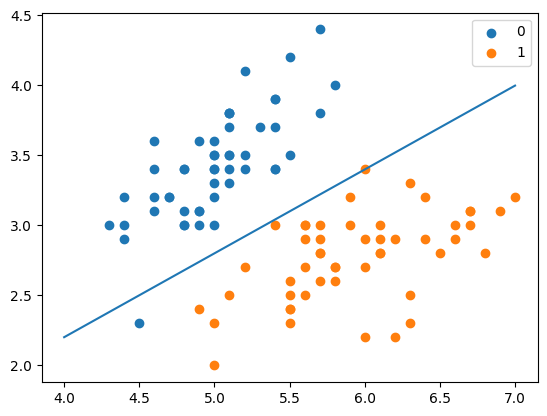

In [133]:
x_ponits = np.arange(4, 8)      # x取值范围
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]    # y的表达式
plt.plot(x_ponits, y_)  # 将上述表达式绘制在图形上

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')   # 绘制lable= '0'散点图
plt.scatter(X[50:,0],X[50:,1], label='1')   # 绘制lable= '1'散点图
plt.legend()                                # 添加图例，下图中的 0 1  

### scikit-learn实例

#### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [134]:
from sklearn.linear_model import LogisticRegression # 从sklearn中导入逻辑斯谛回归

In [135]:
clf = LogisticRegression(max_iter=200)  # 实例化逻辑斯谛回归，并设置最大迭代次数为200

In [136]:
clf.fit(X_train, y_train)           # 使用训练集进行训练

LogisticRegression(max_iter=200)

In [137]:
clf.score(X_test, y_test)   # 测试训练模型在测试集上的准确率

1.0

In [138]:
print(clf.coef_, clf.intercept_)    # 打印w和b的值

[[ 2.85521884 -2.40896001]] [-8.27538577]


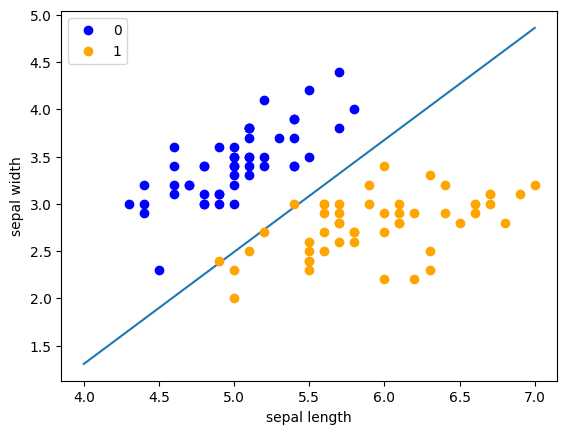

In [139]:
x_ponits = np.arange(4, 8)  # x取值范围
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]   # y的表达式
plt.plot(x_ponits, y_)      # 将上述表达式绘制在图形上

plt.plot(X[:50, 0], X[:50, 1], 'o', color='blue', label='0')    # 绘制lable= '0'散点图
plt.plot(X[50:, 0], X[50:, 1], 'o', color='orange', label='1')  # 绘制lable= '1'散点图
plt.xlabel('sepal length')  # x轴标签
plt.ylabel('sepal width')   # y轴标签
plt.legend()    # 添加图例，下图中的 0 1  

## 最大熵模型

In [140]:
import math # 导入math库
from copy import deepcopy   # deepcopy 是一个用于创建深度复制（deep copy）的函数。
# 深度复制是指创建一个完全独立于原始对象的新对象，包括对象内部的嵌套对象，而不仅仅是原始对象的引用。这对于需要复制复杂数据结构，如嵌套列表或字典，以防止原始对象和副本之间的相互影响非常有用。

In [141]:
class MaxEntropy:  # 定义最大熵模型
    def __init__(self, EPS=0.005):  # 收敛条件默认为0.005
        self._samples = []  # 保存数据集
        self._Y = set()     # 标签集合，相当去去重后的y
        self._numXY = {}    # key为(x,y)，value为出现次数
        self._N = 0         # 样本数
        self._Ep_ = []      # 样本分布的特征期望值
        self._xyID = {}     # key记录(x,y),value记录id号
        self._n = 0         # 特征键值(x,y)的个数
        self._C = 0         # 最大特征数
        self._IDxy = {}     # ///key为(x,y)，value为对应的id号/// # key为id号，value为对应的(x,y)
        self._w = []        # w参数
        self._EPS = EPS     # 收敛条件
        self._lastw = []    # 上一次w参数值

    def loadData(self, dataset):    # 加载训练数据
        self._samples = deepcopy(dataset)   # 深度复制dataset
        for items in self._samples: # 遍历训练数据集
            y = items[0]        # 将标签赋值给y
            X = items[1:]       # 将特征赋值给X
            self._Y.add(y)  # 集合中y若已存在则会自动忽略
            for x in X:         # 遍历特征，统计(x,y)出现的次数   
                if (x, y) in self._numXY:       # 如果key值(x,y)在_numXY中
                    self._numXY[(x, y)] += 1    # 统计值+1
                else:                           # 如果key值(x,y)在_numXY中
                    self._numXY[(x, y)] = 1     # 新建该key并赋1

        self._N = len(self._samples)        # 样本数
        self._n = len(self._numXY)          # 特征键值(x,y)的个数
        self._C = max([len(sample) - 1 for sample in self._samples])    # 最大特征数
        self._w = [0] * self._n     # 初始化参数矩阵;维度:1*n, 值:0 .
        self._lastw = self._w[:]    # 初始化上一次w参数值矩阵

        self._Ep_ = [0] * self._n   # 初始化样本分布的特征期望值;维度:1*n, 值:0 .
        for i, xy in enumerate(self._numXY):  # 计算特征函数fi关于经验分布的期望
            self._Ep_[i] = self._numXY[xy] / self._N    # 样本分布的特征期望值
            self._xyID[xy] = i  # key记录(x,y),value记录id号
            self._IDxy[i] = xy  # key为id号，value为对应的(x,y)

    def _Zx(self, X):  # 计算每个Z(x)值
        zx = 0  # 用来保存规范化因子；初始化为0
        for y in self._Y:
            ss = 0  # 初始化为0
            for x in X: # 遍历特征
                if (x, y) in self._numXY:   # 遍历_numXY元组, key为(x,y), value为出现次数 这个判断相当于指示函数的作用
                    ss += self._w[self._xyID[(x, y)]]   # 累加对应的权值，因为f(x,y)是x,y满足条件的二值函数，所以此处取出(x,y)的对应的id,并根据id取出对应的wi进行累加
            zx += math.exp(ss)  # 规划化因子公式 见课本p100 式6.23
        return zx   # 返回规范化因子

    def _model_pyx(self, y, X):  # 计算每个P(y|x)
        zx = self._Zx(X)    # 计算规范化因子
        ss = 0
        for x in X: # 遍历特征
            if (x, y) in self._numXY:   # 遍历_numXY元组, key为(x,y), value为出现次数  这个判断相当于指示函数的作用
                ss += self._w[self._xyID[(x, y)]]   # 累加对应的权值，因为f(x,y)是x,y满足条件的二值函数，所以此处取出(x,y)的对应的id,并根据id取出对应的wi进行累加
        pyx = math.exp(ss) / zx # P(y|x)公式；见课本p100 式6.22
        return pyx  # 返回P(y|x)

    def _model_ep(self, index):  # 计算特征函数fi关于模型的期望
        x, y = self._IDxy[index]    # _IDxy：key为id号，value为对应的(x,y)
        ep = 0
        for sample in self._samples:    # 遍历训练数据集
            if x not in sample: # 如果x不在sample
                continue        # 跳过循环
            pyx = self._model_pyx(y, sample)    # 计算每个P(y|x)
            ep += pyx / self._N #公式参见p97 式6.11
        return ep

    def _convergence(self):  # 判断是否全部收敛
        for last, now in zip(self._lastw, self._w): # 上一次w参数值 和 现在的w参数值
            if abs(last - now) >= self._EPS:    # 差值大于收敛条件
                return False    # 返回false
        return True # 否则返回true

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X) # 计算每个Z(x)值
        result = {}
        for y in self._Y:   # 标签集合，相当去去重后的y
            ss = 0
            for x in X: # 遍历特征
                if (x, y) in self._numXY:   # 遍历_numXY元组, key为(x,y), value为出现次数  这个判断相当于指示函数的作用
                    ss += self._w[self._xyID[(x, y)]]   # 累加对应的权值，因为f(x,y)是x,y满足条件的二值函数，所以此处取出(x,y)的对应的id,并根据id取出对应的wi进行累加
            pyx = math.exp(ss) / Z  # P(y|x)公式；见课本p100 式6.22
            result[y] = pyx # 存储预测的概率
        return result   # 返回结果

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            print("iter:%d" % loop)     # 输出本次迭代为第几次
            self._lastw = self._w[:]    # 记录上一次w参数值 
            for i in range(self._n):    # 对每个(x,y)进行迭代
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数
            print("w:", self._w)    # 输出参数w
            if self._convergence():  # 判断是否收敛
                break

In [142]:
# 训练数据
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

In [143]:
maxent = MaxEntropy()   # 实例化最大熵模型
x = ['overcast', 'mild', 'high', 'FALSE']   # 希望预测的数据 

In [ ]:
maxent.loadData(dataset)    # 加载数据
maxent.train()              # 训练

In [146]:
print('predict:', maxent.predict(x))    # 对x进行预测，并打印预测值

predict: {'no': 2.819781341881656e-06, 'yes': 0.9999971802186581}


## 第6章Logistic回归与最大熵模型-习题

### 习题6.1
&emsp;&emsp;确认Logistic分布属于指数分布族。

**解答：**  
**第1步：**  
首先给出指数分布族的定义：  
对于随机变量$x$，在给定参数$\eta$下，其概率分别满足如下形式：$$p(x|\eta)=h(x)g(\eta)\exp(\eta^Tu(x))$$我们称之为**指数分布族**。  
其中：  
$x$：可以是标量或者向量，可以是离散值也可以是连续值  
$\eta$：自然参数  
$g(\eta)$：归一化系数  
$h(x),u(x)$：$x$的某个函数  

----

**第2步：**证明伯努利分布属于指数分布族  
伯努利分布：$\varphi$是$y=1$的概率，即$P(Y=1)=\varphi$  
$\begin{aligned}
P(y|\varphi) 
&= \varphi^y (1-\varphi)^{(1-y)} \\
&= (1-\varphi) \varphi^y (1-\varphi)^{(-y)} \\
&= (1-\varphi) (\frac{\varphi}{1-\varphi})^y \\
&= (1-\varphi) \exp\left(y \ln \frac{\varphi}{1-\varphi} \right) \\
&= \frac{1}{1+e^\eta} \exp (\eta y)
\end{aligned}$  
其中，$\displaystyle \eta=\ln \frac{\varphi}{1-\varphi} \Leftrightarrow \varphi = \frac{1}{1+e^{-\eta}}$  
将$y$替换成$x$，可得$\displaystyle P(x|\eta) = \frac{1}{1+e^\eta} \exp (\eta x)$
对比可知，伯努利分布属于指数分布族，其中$\displaystyle h(x) = 1, g(\eta)= \frac{1}{1+e^\eta}, u(x)=x$  

----

**第3步：**  
广义线性模型（GLM）必须满足三个假设：
1. $y | x;\theta \sim ExponentialFamily(\eta)$，即假设预测变量$y$在给定$x$，以$\theta$为参数的条件概率下，属于以$\eta$作为自然参数的指数分布族；  
2. 给定$x$，求解出以$x$为条件的$T(y)$的期望$E[T(y)|x]$，即算法输出为$h(x)=E[T(y)|x]$  
3. 满足$\eta=\theta^T x$，即自然参数和输入特征向量$x$之间线性相关，关系由$\theta$决定，仅当$\eta$是实数时才有意义，若$\eta$是一个向量，则$\eta_i=\theta_i^T x$

----

**第4步：**推导伯努利分布的GLM  
已知伯努利分布属于指数分布族，对给定的$x,\eta$，求解期望：$$\begin{aligned}
h_{\theta}(x) 
&= E[y|x;\theta] \\
&= 1 \cdot p(y=1)+ 0 \cdot p(y=0) \\
&= \varphi \\
&= \frac{1}{1+e^{-\eta}} \\
&= \frac{1}{1+e^{-\theta^T x}}
\end{aligned}$$可得到Logistic回归算法，故Logistic分布属于指数分布族，得证。

### 习题6.2
&emsp;&emsp;写出Logistic回归模型学习的梯度下降算法。

**解答：**  
对于Logistic模型：$$P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)}$$
对数似然函数为：$\displaystyle L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log \left(1+\exp (w \cdot x_i)\right)\right]$  
似然函数求偏导，可得$\displaystyle \frac{\partial L(w)}{\partial w^{(j)}}=\sum_{i=1}^N\left[x_i^{(j)} \cdot y_i-\frac{\exp (w \cdot x_i) \cdot x_i^{(j)}}{1+\exp (w \cdot x_i)}\right]$  
梯度函数为：$\displaystyle \nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(m)}}\right]$  
Logistic回归模型学习的梯度下降算法：  
(1) 取初始值$x^{(0)} \in R$，置$k=0$  
(2) 计算$f(x^{(k)})$  
(3) 计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| < \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，求$\lambda_k$，使得$\displaystyle f(x^{(k)}+\lambda_k g_k) = \max_{\lambda \geqslant 0}f(x^{(k)}+\lambda g_k)$  
(4) 置$x^{(k+1)}=x^{(k)}+\lambda_k g_k$，计算$f(x^{(k+1)})$，当$\|f(x^{(k+1)}) - f(x^{(k)})\| < \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| < \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$  
(5) 否则，置$k=k+1$，转(3)

In [20]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']


class LogisticRegression:
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate  # 学习率
        self.max_iter = max_iter  # 迭代次数
        self.tol = tol  # 迭代停止阈值
        self.w = None  # 权重

    def preprocessing(self, X): # 新加一列，处理偏置b
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]    # 取X 0维的形状
        y = np.ones(row).reshape(row, 1)    # 新建一个1*row的数组，其中元素全为1，并将其转置
        X_prepro = np.hstack((X, y))    # 按水平方向（列顺序）堆叠数组构成一个新的数组
        return X_prepro

    def sigmod(self, x):    # 定义sigmod函数
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train) # 将原始X末尾加上一列，该列数值全部为1，处理偏置b
        y = y_train.T  # 对 y_train 转置赋值给y
        self.w = np.array([[0] * X.shape[1]], dtype=np.float)   # 初始化权重w
        k = 0   # 记录迭代次数
        for loop in range(self.max_iter):   # 根据设置的迭代次数进行迭代训练
            # 计算梯度
            z = np.dot(X, self.w.T)     # 计算W*X
            grad = X * (y - self.sigmod(z)) # 计算梯度
            grad = grad.sum(axis=0) # 列求和

            if (np.abs(grad) <= self.tol).all():    # 利用梯度的绝对值作为迭代中止的条件
                break
            else:
                self.w += self.learn_rate * grad    # 更新权重w 梯度上升——求极大值
                k += 1  # 迭代次数+1
        print("迭代次数：{}次".format(k))           # 输出迭代次数
        print("最终梯度：{}".format(grad))          # 输出最终梯度   
        print("最终权重：{}".format(self.w[0]))     # 输出最终权重  

    def predict(self, x):           # 预测
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))    # 计算sigmod的值--处理输入特征并转置输入标签后计算点乘后计算sigmod
        # rint("Y=1的概率被估计为：{:.2%}".format(p[0][0]))  # 调用score时，注释掉

        # 1.np.where(condition,x,y) 当where内有三个参数时，第一个参数表示条件，当条件成立时where方法返回x，当条件不成立时where返回y
        # 2.np.where(condition) 当where内只有一个参数时，那个参数表示条件，当条件成立时，where返回的是每个符合condition条件元素的坐标,返回的是以元组的形式
        p[np.where(p > 0.5)] = 1    # 如果p > 0.5；预测为类别1
        p[np.where(p < 0.5)] = 0    # 如果p < 0.5；预测为类别0
        return p

    def score(self, X, y):
        y_c = self.predict(X)   # 预测
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]   # 计算错误率
        return 1 - error_rate   # 返回正确率

    def draw(self, X, y):
        # 分离正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]  # 类别标记为1的点的坐标
        X_ne = X[np.where(y == 0)]  # 类别标记为0的点的坐标
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')  # 设置三维轴
        x_1 = X_po[0, :]    # 标记为1的点的坐标x轴
        y_1 = X_po[1, :]    # 标记为1的点的坐标y轴
        z_1 = X_po[2, :]    # 标记为1的点的坐标z轴
        x_2 = X_ne[0, :]    # 标记为0的点的坐标x轴
        y_2 = X_ne[1, :]    # 标记为0的点的坐标y轴
        z_2 = X_ne[2, :]    # 标记为0的点的坐标z轴
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")    # 绘制正实例点
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")    # 绘制负实例点
        ax.legend(loc='best')   # 添加图例
        # 绘制p=0.5的区分平面
        x = np.linspace(-3, 3, 3)   # 通过定义均匀间隔创建数值序列，间隔起始点、终止端，以及指定分隔值总数
        y = np.linspace(-3, 3, 3)   # 通过定义均匀间隔创建数值序列，间隔起始点、终止端，以及指定分隔值总数
        x_3, y_3 = np.meshgrid(x, y)    # 生成网格点坐标矩阵
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c  # 平面方程
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)  # 调节透明度
        plt.show()  # 显示所有打开的图形。

迭代次数：3232次
最终梯度：[ 0.00144779  0.00046133  0.00490279 -0.00999848]
最终权重：[  2.96908597   1.60115396   5.04477438 -13.43744079]


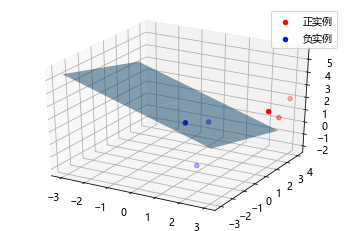

In [21]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1],
                    [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)

### 习题6.3
&emsp;&emsp;写出最大熵模型学习的DFP算法。（关于一般的DFP算法参见附录B）

**解答：**  
**第1步：**  
最大熵模型为：$$
\begin{array}{cl}
{\max } & {H(p)=-\sum_{x, y} P(x) P(y | x) \log P(y | x)} \\ 
{\text {st.}} &
{E_p(f_i)-E_{\hat{p}}(f_i)=0, \quad i=1,2, \cdots,n} \\ 
& {\sum_y P(y | x)=1}
\end{array}$$引入拉格朗日乘子，定义拉格朗日函数：$$
L(P, w)=\sum_{xy} P(x) P(y | x) \log P(y | x)+w_0 \left(1-\sum_y P(y | x)\right) \\
+\sum_{i=1} w_i\left(\sum_{xy} P(x, y) f_i(x, y)-\sum_{xy} P(x, y) P(y | x) f_i(x, y)\right)$$
最优化原始问题为：$$\min_{P \in C} \max_{w} L(P,w)$$对偶问题为：$$\max_{w} \min_{P \in C} L(P,w)$$令$$\Psi(w) = \min_{P \in C} L(P,w) = L(P_w, w)$$$\Psi(w)$称为对偶函数，同时，其解记作$$P_w = \mathop{\arg \min}_{P \in C} L(P,w) = P_w(y|x)$$求$L(P,w)$对$P(y|x)$的偏导数，并令偏导数等于0，解得：$$P_w(y | x)=\frac{1}{Z_w(x)} \exp \left(\sum_{i=1}^n w_i f_i (x, y)\right)$$其中：$$Z_w(x)=\sum_y \exp \left(\sum_{i=1}^n w_i f_i(x, y)\right)$$则最大熵模型目标函数表示为$$\varphi(w)=\min_{w \in R_n} \Psi(w) = \sum_{x} P(x) \log \sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)-\sum_{x, y} P(x, y) \sum_{i=1}^{n} w_{i} f_{i}(x, y)$$  

**第2步：**  
DFP的$G_{k+1}$的迭代公式为：$$G_{k+1}=G_k+\frac{\delta_k \delta_k^T}{\delta_k^T y_k}-\frac{G_k y_k y_k^T G_k}{y_k^T G_k y_k}$$  
**最大熵模型的DFP算法：**   
输入：目标函数$\varphi(w)$，梯度$g(w) = \nabla g(w)$，精度要求$\varepsilon$；  
输出：$\varphi(w)$的极小值点$w^*$  
(1)选定初始点$w^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$  
(2)计算$g_k=g(w^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k)}$，否则转(3)  
(3)置$p_k=-G_kg_k$  
(4)一维搜索：求$\lambda_k$使得$$\varphi\left(w^{(k)}+\lambda_k P_k\right)=\min _{\lambda \geqslant 0} \varphi\left(w^{(k)}+\lambda P_{k}\right)$$(5)置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$  
(6)计算$g_{k+1}=g(w^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k+1)}$；否则，按照迭代式算出$G_{k+1}$  
(7)置$k=k+1$，转(3)  

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)